In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
df = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = df.load_data()

In [3]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))


In [4]:
class_names = ['Tshirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [5]:
X_train_n = X_train_full / 255
X_test_n = X_test / 255

In [6]:
X_valid , X_train = X_train_n[:5000] , X_train_n[5000:]
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test_n

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding ='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [11]:
model_history = model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_valid,y_valid))


Epoch 1/10
860/860 [==============================] - 20s 23ms/step - loss: 0.8430 - accuracy: 0.7115 - val_loss: 0.7993 - val_accuracy: 0.7136
Epoch 2/10
860/860 [==============================] - 19s 22ms/step - loss: 0.5328 - accuracy: 0.8080 - val_loss: 0.4877 - val_accuracy: 0.8152
Epoch 3/10
860/860 [==============================] - 20s 23ms/step - loss: 0.4748 - accuracy: 0.8282 - val_loss: 1.0102 - val_accuracy: 0.6980
Epoch 4/10
860/860 [==============================] - 20s 23ms/step - loss: 0.4379 - accuracy: 0.8447 - val_loss: 0.4052 - val_accuracy: 0.8610
Epoch 5/10
860/860 [==============================] - 20s 23ms/step - loss: 0.4138 - accuracy: 0.8512 - val_loss: 0.4189 - val_accuracy: 0.8522
Epoch 6/10
860/860 [==============================] - 20s 24ms/step - loss: 0.3901 - accuracy: 0.8596 - val_loss: 0.3673 - val_accuracy: 0.8738
Epoch 7/10
860/860 [==============================] - 20s 23ms/step - loss: 0.3730 - accuracy: 0.8664 - val_loss: 0.4100 - val_accuracy:

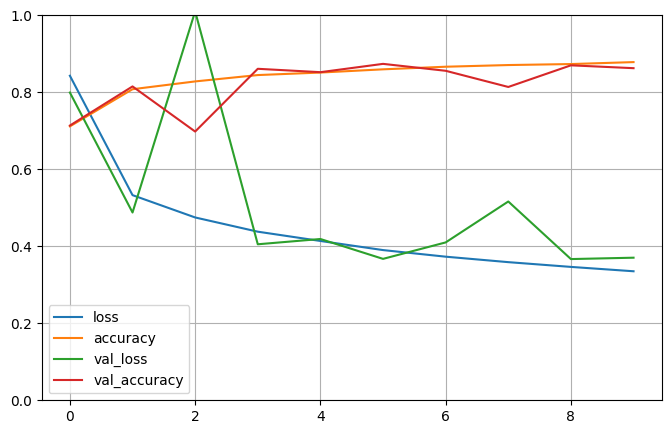

In [12]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
ev = model.evaluate(X_test , y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4009 - accuracy: 0.8495


In [14]:
ev

[0.400869756937027, 0.8495000004768372]

In [15]:
X_new = X_test[:3]
y_pred    = model.predict(X_new)
classes_y = np.argmax(y_pred,axis=1)
classes_y

1/1 [==============================] - 0s 105ms/step


array([9, 2, 1], dtype=int64)

In [22]:
class_names[classes_y[1]]

'Pullover'

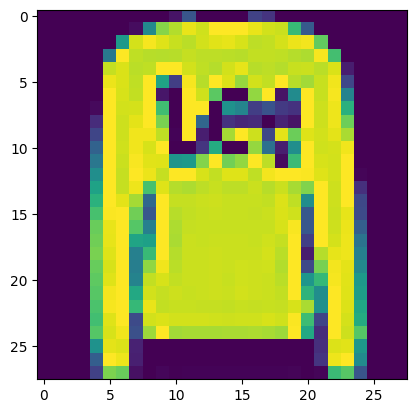

In [25]:
plt.imshow(X_test[1].reshape(28,28))

In [26]:
keras.backend.clear_session

<function keras.src.backend.clear_session()>